In [58]:
import sys
# !{sys.executable} -m pip install 

from os import walk
import warnings

from PIL import Image

from numpy import asarray, empty_like, empty
import numpy as np
#from scipy.ndimage.interpolation import shift

In [2]:
dir = "/Users/kornellugosi/Star Photography workdir/23"

In [3]:
files = []
for (dirpath, dirnames, filenames) in walk(dir):
    files.extend([filename for filename in filenames if filename.endswith(".jpg") or filename.endswith(".png")] )
    break

In [4]:
loaded_images = []
for file in files:
    loaded_images.extend([asarray(Image.open(dir + "/" + file))])

In [5]:
output = empty_like(loaded_images[0], dtype=float)

In [6]:
for image in loaded_images:
    output += image
    
output /= len(loaded_images)

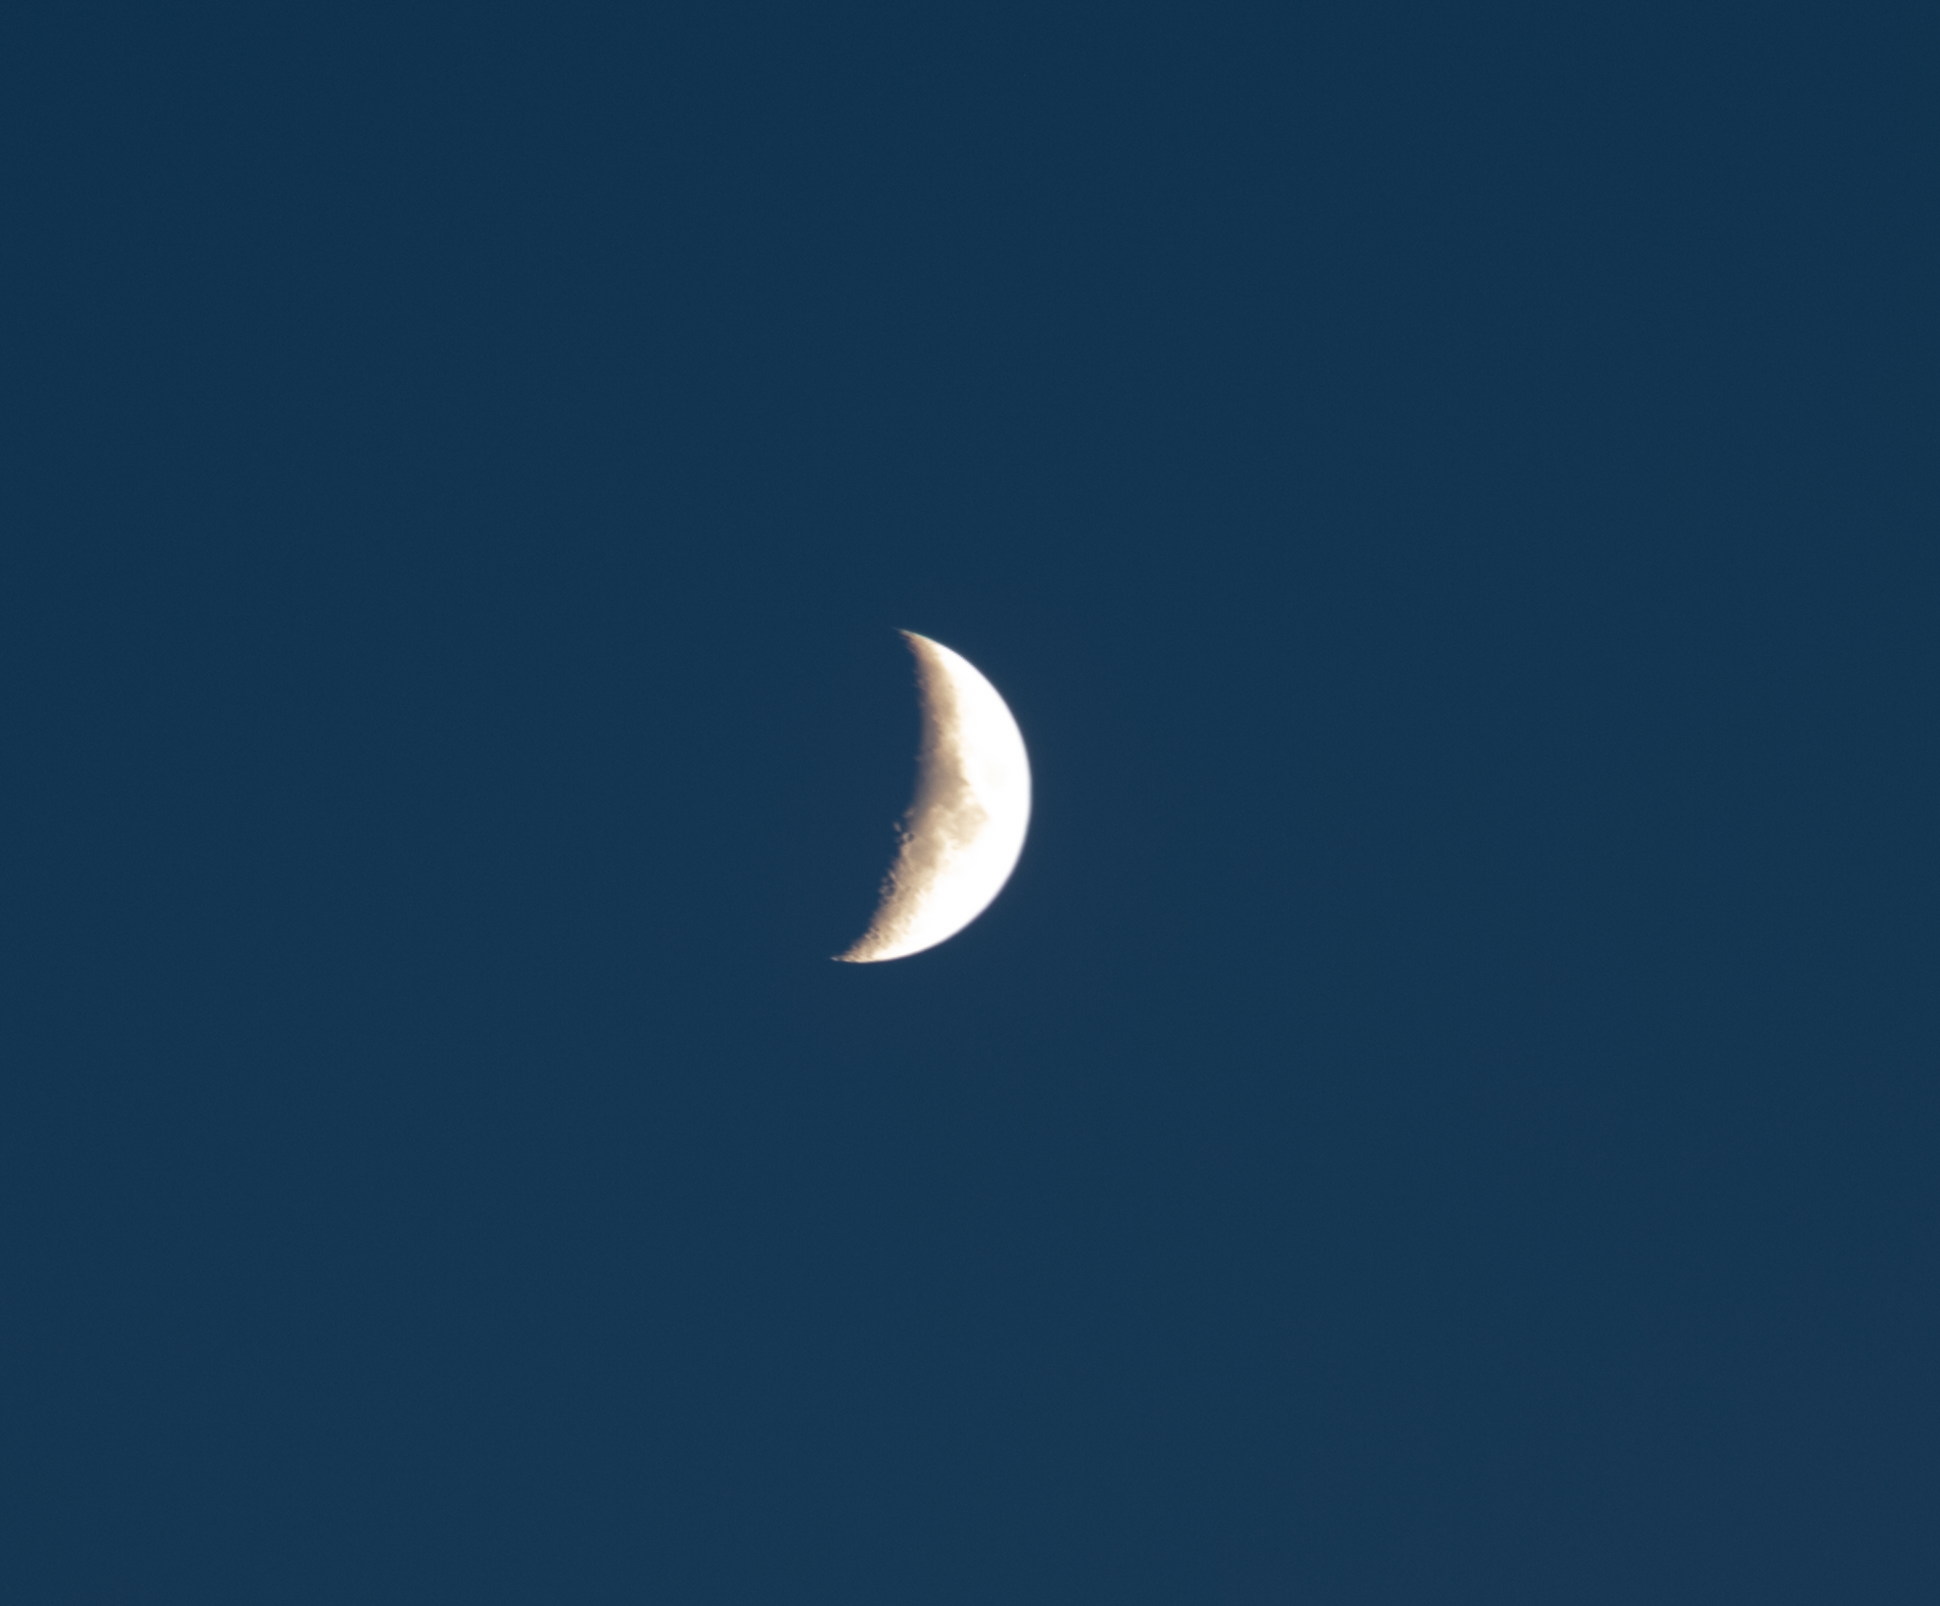

In [7]:
Image.fromarray(output.astype(np.uint8))

In [53]:
def to_grayscale(img):
    bw = empty((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            bw[i, j] = img[i, j, 0]*.2126 + img[i, j, 1] * .7152 + img[i, j, 2] * .072
    return bw

In [54]:
%%time

bw1 = to_grayscale(loaded_images[0])
bw2 = to_grayscale(loaded_images[1])

CPU times: user 50.1 s, sys: 197 ms, total: 50.3 s
Wall time: 51.4 s


In [67]:
(abs(bw1 - bw2)).sum()

CPU times: user 14.2 ms, sys: 3.94 ms, total: 18.2 ms
Wall time: 21.5 ms


9203557.336199999

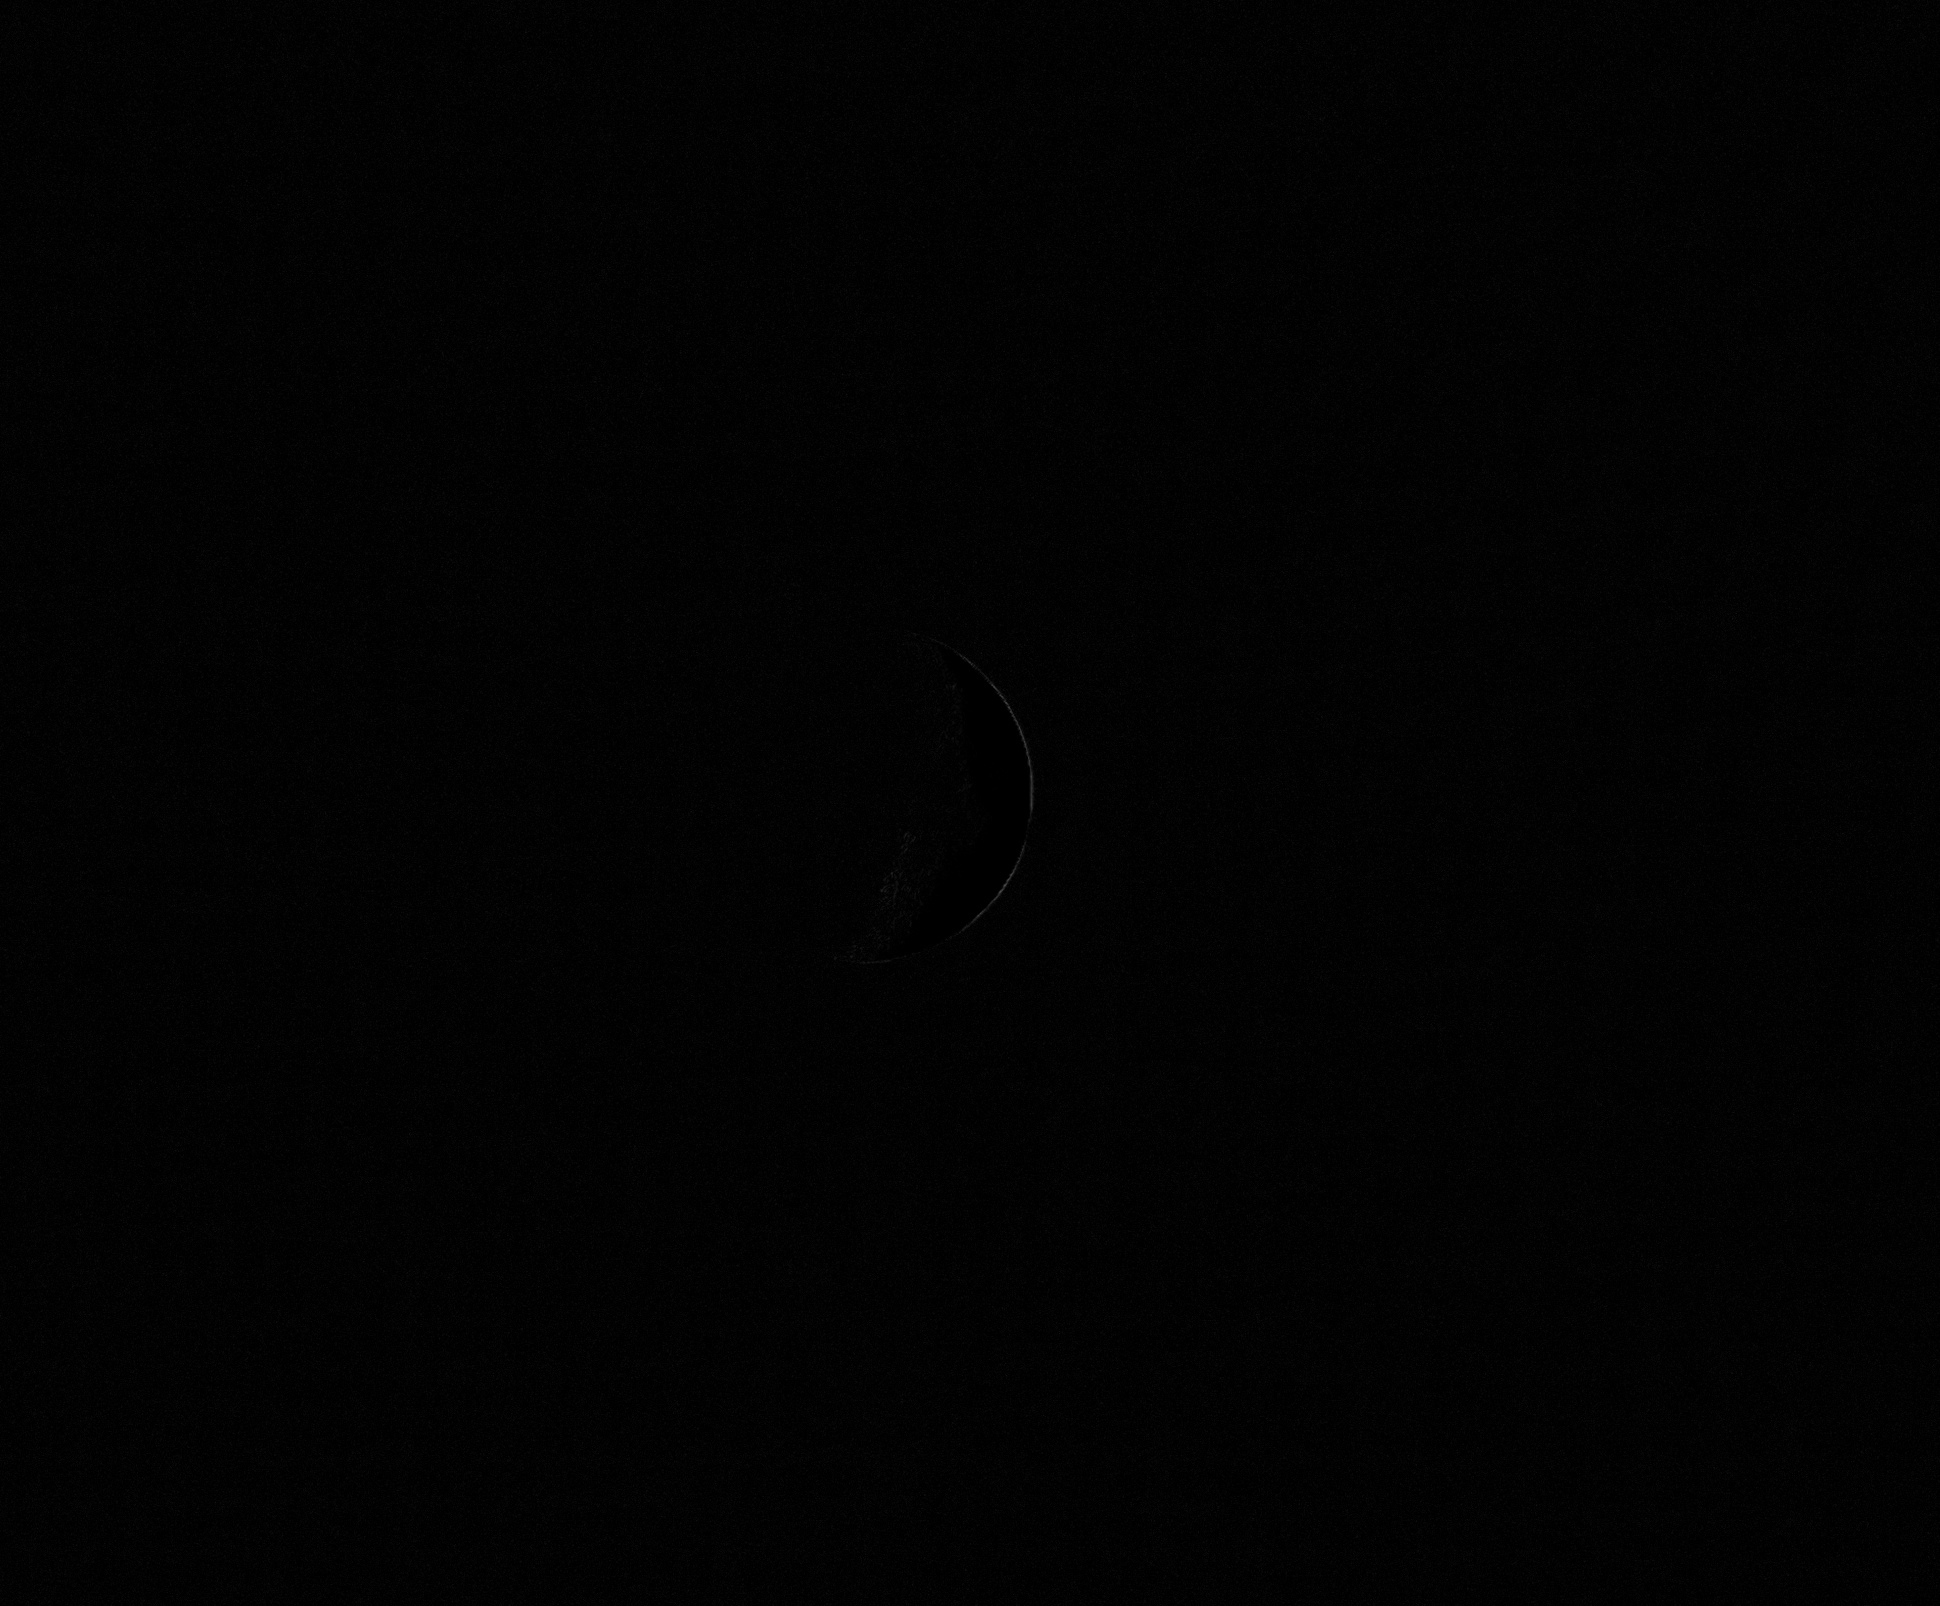

In [65]:
Image.fromarray(abs(bw1 - bw2).astype(np.uint8)) 